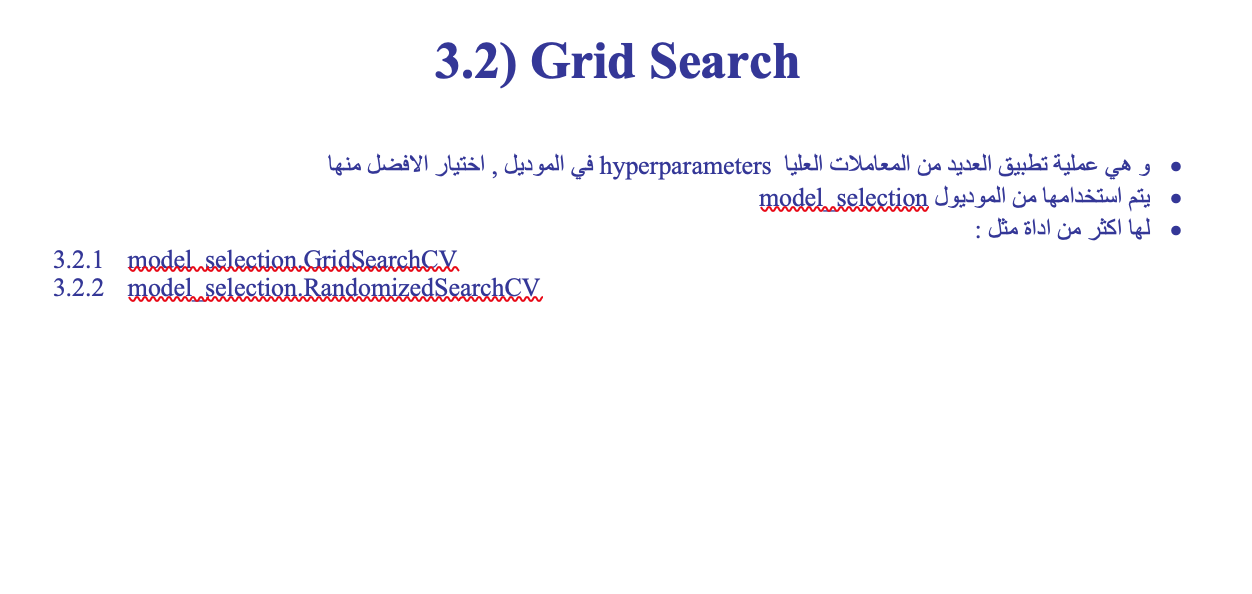

In [1]:
from IPython.display import Image
Image(filename='5.png')

# 1- GridSearchCV

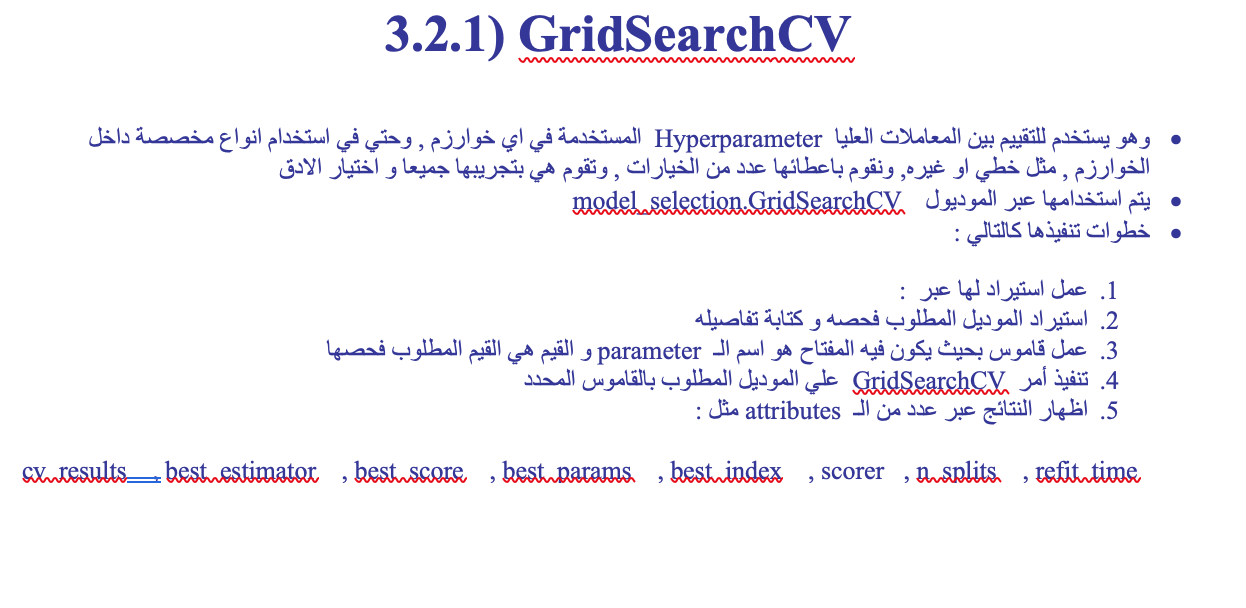

In [46]:
Image(filename='6.png')

In [48]:
#Import Libraries
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt



### Example 1

In [5]:

#load boston data

BostonData = load_boston()

#X Data
X = BostonData.data

#y Data
y = BostonData.target


In [6]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [8]:
#Applying Grid Searching :  

from sklearn.svm import SVR
svm_model = SVR(epsilon=.01, gamma='auto')
param_selected= {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5]}

GridSearchModel = GridSearchCV(svm_model, param_selected, cv=2, return_train_score = True)
GridSearchModel.fit(X_train, y_train)

/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.01, gamma='auto', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [20]:
GridSearchRes = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]
GridSearchRes

,mean_test_score,std_test_score,params,rank_test_score,mean_fit_time
0,0.688099,0.070328,"{'C': 1, 'kernel': 'linear'}",3,0.951909
1,-0.010096,0.020185,"{'C': 1, 'kernel': 'rbf'}",10,0.001532
2,0.685138,0.067654,"{'C': 2, 'kernel': 'linear'}",5,1.804638
3,0.002535,0.021781,"{'C': 2, 'kernel': 'rbf'}",9,0.001644
4,0.689410,0.070710,"{'C': 3, 'kernel': 'linear'}",2,4.100539
5,0.012946,0.023663,"{'C': 3, 'kernel': 'rbf'}",8,0.001659
6,0.690539,0.068558,"{'C': 4, 'kernel': 'linear'}",1,2.601839
7,0.019897,0.026568,"{'C': 4, 'kernel': 'rbf'}",7,0.001856
8,0.686462,0.064187,"{'C': 5, 'kernel': 'linear'}",4,9.098526
9,0.026573,0.027808,"{'C': 5, 'kernel': 'rbf'}",6,0.001897


In [11]:
# Showing Results
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

Best Score is : 0.6905394044039519
Best Parameters are : {'C': 4, 'kernel': 'linear'}
Best Estimator is : SVR(C=4, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


### Example 2

In [24]:
iris = load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5]}
from sklearn.svm import SVC

svc = SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
pd.DataFrame(clf.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]


,mean_test_score,std_test_score,params,rank_test_score,mean_fit_time
0,0.980000,0.016330,"{'C': 1, 'kernel': 'linear'}",2,0.000583
1,0.966667,0.021082,"{'C': 1, 'kernel': 'rbf'}",10,0.000513
2,0.980000,0.016330,"{'C': 2, 'kernel': 'linear'}",2,0.000442
3,0.980000,0.016330,"{'C': 2, 'kernel': 'rbf'}",2,0.000590
4,0.973333,0.024944,"{'C': 3, 'kernel': 'linear'}",8,0.000390
5,0.980000,0.016330,"{'C': 3, 'kernel': 'rbf'}",2,0.000553
6,0.973333,0.024944,"{'C': 4, 'kernel': 'linear'}",8,0.000471
7,0.980000,0.016330,"{'C': 4, 'kernel': 'rbf'}",2,0.000426
8,0.980000,0.026667,"{'C': 5, 'kernel': 'linear'}",2,0.000426
9,0.986667,0.016330,"{'C': 5, 'kernel': 'rbf'}",1,0.000429


In [26]:

print('score : ' , clf.best_score_)
print('params : ' , clf.best_params_)
print('best : ' , clf.best_estimator_)


score :  0.9866666666666667
params :  {'C': 5, 'kernel': 'rbf'}
best :  SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### Example 3

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data
y = iris.target


In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)


[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [31]:
k_range = list(range(1, 31))
print(k_range)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [32]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [33]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [34]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [37]:
print('score : ' , grid.best_score_)
print('params : ' , grid.best_params_)
print('best : ' , grid.best_estimator_)


score :  0.98
params :  {'n_neighbors': 13}
best :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


In [41]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)


[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

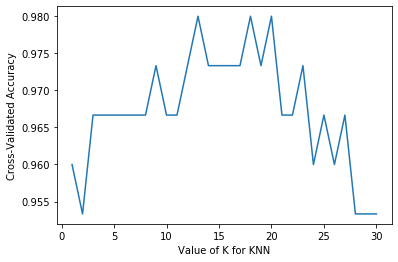

In [40]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


In [45]:
1e2

100.0

# 2- RandomizedSearchCV

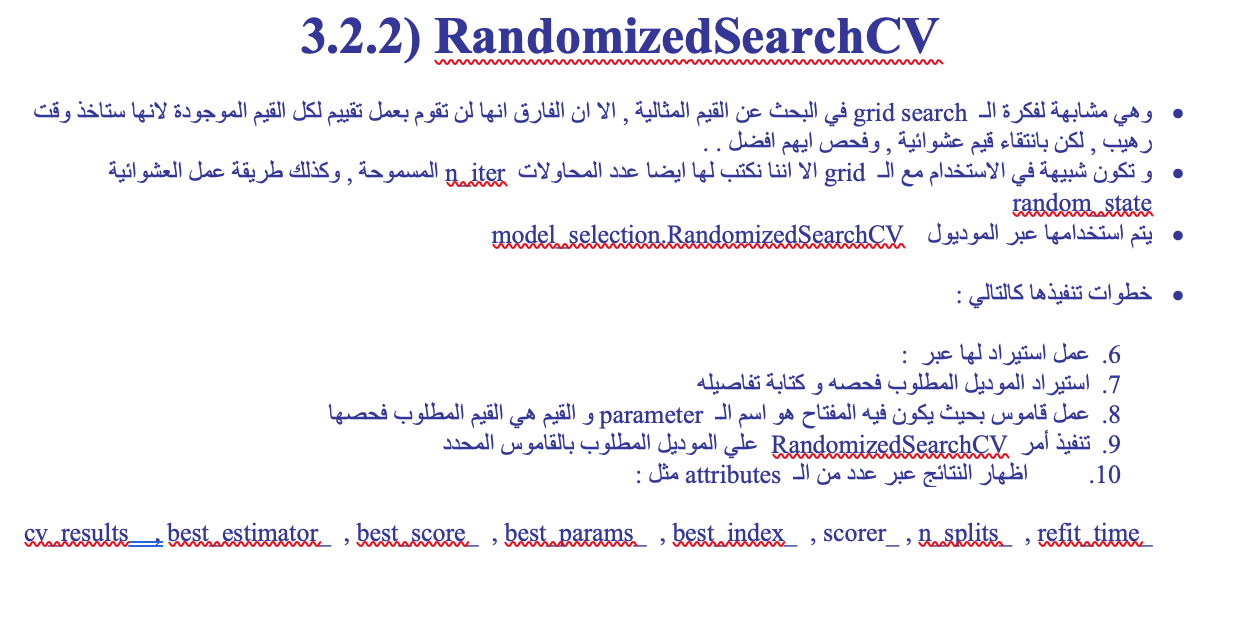

In [47]:
Image(filename='7.png')

### Example 1

In [49]:
#load boston data

BostonData = load_boston()

#X Data
X = BostonData.data

#y Data
y = BostonData.target
#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
 

In [50]:
SelectedModel = SVR(epsilon=1,gamma='auto')
SelectedParameters = {'kernel':('linear', 'rbf'), 'C':[1,2]}

RandomizedSearchModel = RandomizedSearchCV(SelectedModel,SelectedParameters, cv = 2,return_train_score=True)
RandomizedSearchModel.fit(X_train, y_train)
sorted(RandomizedSearchModel.cv_results_.keys())
RandomizedSearchResults = pd.DataFrame(RandomizedSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
# Showing Results
print('All Results are :\n', RandomizedSearchResults )


All Results are :
    mean_test_score  std_test_score                        params  \
0         0.686640        0.065040  {'kernel': 'linear', 'C': 1}   
1        -0.007970        0.019323     {'kernel': 'rbf', 'C': 1}   
2         0.685146        0.073608  {'kernel': 'linear', 'C': 2}   
3         0.002935        0.021366     {'kernel': 'rbf', 'C': 2}   

   rank_test_score  mean_fit_time  
0                1       0.808408  
1                4       0.001453  
2                2       1.606218  
3                3       0.001607  


In [53]:
print('Best Score is :', RandomizedSearchModel.best_score_)
print('Best Parameters are :', RandomizedSearchModel.best_params_)
print('Best Estimator is :', RandomizedSearchModel.best_estimator_)

Best Score is : 0.6866397782765947
Best Parameters are : {'kernel': 'linear', 'C': 1}
Best Estimator is : SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
